# readme
descrip: plot North Atlantic to find POP t12 and g16 nlat and nlon ranges, the nlat and nlon ranges will be used as a reference for all analysis (only choose this region so it saves memory and  computation time) <br>

update history: <br>
v1.0 DL 2021May31 <br>
 
extra notes: <br>


# import modules

In [1]:
# general python packages
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
# import matplotlib.dates as mdates
%matplotlib inline
import proplot as plot
import cartopy
# import cartopy.crs as ccrs
cartopy.config['pre_existing_data_dir']='/scratch/group/ihesp/shared/cartopy_features'
# from cartopy.mpl.geoaxes import GeoAxes
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
# from mpl_toolkits.axes_grid1 import AxesGrid

# python GCM(POP) packages
# import xgcm
# import pop_tools
# import xoak
# import xesmf as xe

# dask jupyter lab packages
# from dask.distributed import Client
# from dask.distributed import performance_report

# file name with time packages
# from itertools import product
# from cftime import DatetimeNoLeap

# define parameters

In [2]:
# lat, lon ranges and nlat, nlon ranges for t12 and g16 grids, nlat and nlon ranges are slightly larger than lat and lon ranges. 
lon1,lon2 = -100, -40
lat1,lat2 = 10, 60

nlon1_t12, nlon2_t12 = 50, 800
nlat1_t12, nlat2_t12 = 1200, 2100

nlon1_g16, nlon2_g16 = 260, 321
nlat1_g16, nlat2_g16 = 200, 370

# ds_NA_t12 = ds_t12.isel(nlon=slice(50,800),nlat=slice(1200,2100))
# ds_NA_g16 = ds_g16.isel(nlon=slice(260,321),nlat=slice(210,370))

lon1_GM, lon2_GM = -71+360, -66+360 # GM: Gulf of Maine
lat1_GM, lat2_GM = 41, 45

nlon1_t12_GM, nlon2_t12_GM = 50+300, 800-300
nlat1_t12_GM, nlat2_t12_GM = 1200+400, 2100-400

nlon1_g16_GM, nlon2_g16_GM = 260, 321
nlat1_g16_GM, nlat2_g16_GM = 200+50, 370

In [3]:
infile_g16 = ('/scratch/group/ihesp/user/dapengli/Projects4iHESP/SupplementaryFiles4POP/'
'POPgrids_gx1v6_2020Jun29.nc') # POP g16 grid file
ds_g16 = xr.open_dataset(infile_g16)
ds_g16

<xarray.Dataset>
Dimensions:      (nlat: 384, nlon: 320, z_t: 60, z_w: 60, z_w_bot: 60)
Coordinates:
    TLAT         (nlat, nlon) float64 ...
    TLONG        (nlat, nlon) float64 ...
  * z_t          (z_t) float64 500.0 1.5e+03 2.5e+03 ... 5.125e+05 5.375e+05
  * z_w          (z_w) float64 0.0 1e+03 2e+03 3e+03 ... 4.75e+05 5e+05 5.25e+05
  * z_w_bot      (z_w_bot) float64 1e+03 2e+03 3e+03 ... 5e+05 5.25e+05 5.5e+05
Dimensions without coordinates: nlat, nlon
Data variables:
    ULAT         (nlat, nlon) float64 ...
    ULONG        (nlat, nlon) float64 ...
    DXT          (nlat, nlon) float64 ...
    DYT          (nlat, nlon) float64 ...
    TAREA        (nlat, nlon) float64 ...
    KMT          (nlat, nlon) int32 ...
    REGION_MASK  (nlat, nlon) int32 ...
    dz           (z_t) float64 ...
Attributes:
    lateral_dims:         [384 320]
    vertical_dims:        60
    vert_grid_file:       gx1v7_vert_grid
    horiz_grid_fname:     inputdata/ocn/pop/gx1v6/grid/horiz_grid_20010402.ie...
    topography_fname:     inputdata/ocn/pop/gx1v6/grid/topography_20090204.ie...
    region_mask_fname:    inputdata/ocn/pop/gx1v6/grid/region_mask_20090205.i...
    type:                 dipole
    region_mask_regions:  {'Caspian Sea': -14, 'Black Sea': -13, 'Baltic Sea'...
    title:                POP_gx1v6 grid

In [4]:
infile_t12 = ('/scratch/group/ihesp/user/dapengli/Projects4iHESP/SupplementaryFiles4POP/'
'POPgrids_tx0.1v2_2020Jun29.nc') # POP t12 grid file
ds_t12 = xr.open_dataset(infile_t12)
ds_t12

<xarray.Dataset>
Dimensions:      (nlat: 2400, nlon: 3600, z_t: 62, z_w: 62, z_w_bot: 62)
Coordinates:
    TLAT         (nlat, nlon) float64 ...
    TLONG        (nlat, nlon) float64 ...
  * z_t          (z_t) float64 500.0 1.5e+03 2.5e+03 ... 5.625e+05 5.875e+05
  * z_w          (z_w) float64 0.0 1e+03 2e+03 ... 5.25e+05 5.5e+05 5.75e+05
  * z_w_bot      (z_w_bot) float64 1e+03 2e+03 3e+03 ... 5.5e+05 5.75e+05 6e+05
Dimensions without coordinates: nlat, nlon
Data variables:
    ULAT         (nlat, nlon) float64 ...
    ULONG        (nlat, nlon) float64 ...
    DXT          (nlat, nlon) float64 ...
    DYT          (nlat, nlon) float64 ...
    TAREA        (nlat, nlon) float64 ...
    KMT          (nlat, nlon) int32 ...
    REGION_MASK  (nlat, nlon) int32 ...
    dz           (z_t) float64 ...
Attributes:
    lateral_dims:       [2400 3600]
    vertical_dims:      62
    vert_grid_file:     tx0.1v3_vert_grid
    horiz_grid_fname:   inputdata/ocn/pop/tx0.1v2/grid/horiz_grid_200709.ieeer8
    topography_fname:   inputdata/ocn/pop/tx0.1v2/grid/topography_km62_201711...
    region_mask_fname:  inputdata/ocn/pop/tx0.1v2/grid/region_mask_20080702.i...
    type:               tripole
    title:              POP_tx0.1v2 grid

In [5]:
ds_NA_t12 = ds_t12.isel(nlon=slice(nlon1_t12, nlon2_t12),nlat=slice(nlat1_t12, nlat2_t12))
ds_NA_g16 = ds_g16.isel(nlon=slice(nlon1_g16, nlon2_g16),nlat=slice(nlat1_g16, nlat2_g16))

ds_GM_t12 = ds_t12.isel(nlon=slice(nlon1_t12_GM, nlon2_t12_GM),nlat=slice(nlat1_t12_GM, nlat2_t12_GM))
ds_GM_g16 = ds_g16.isel(nlon=slice(nlon1_g16_GM, nlon2_g16_GM),nlat=slice(nlat1_g16_GM, nlat2_g16_GM))

# make pics 
North Atlantic (NA)

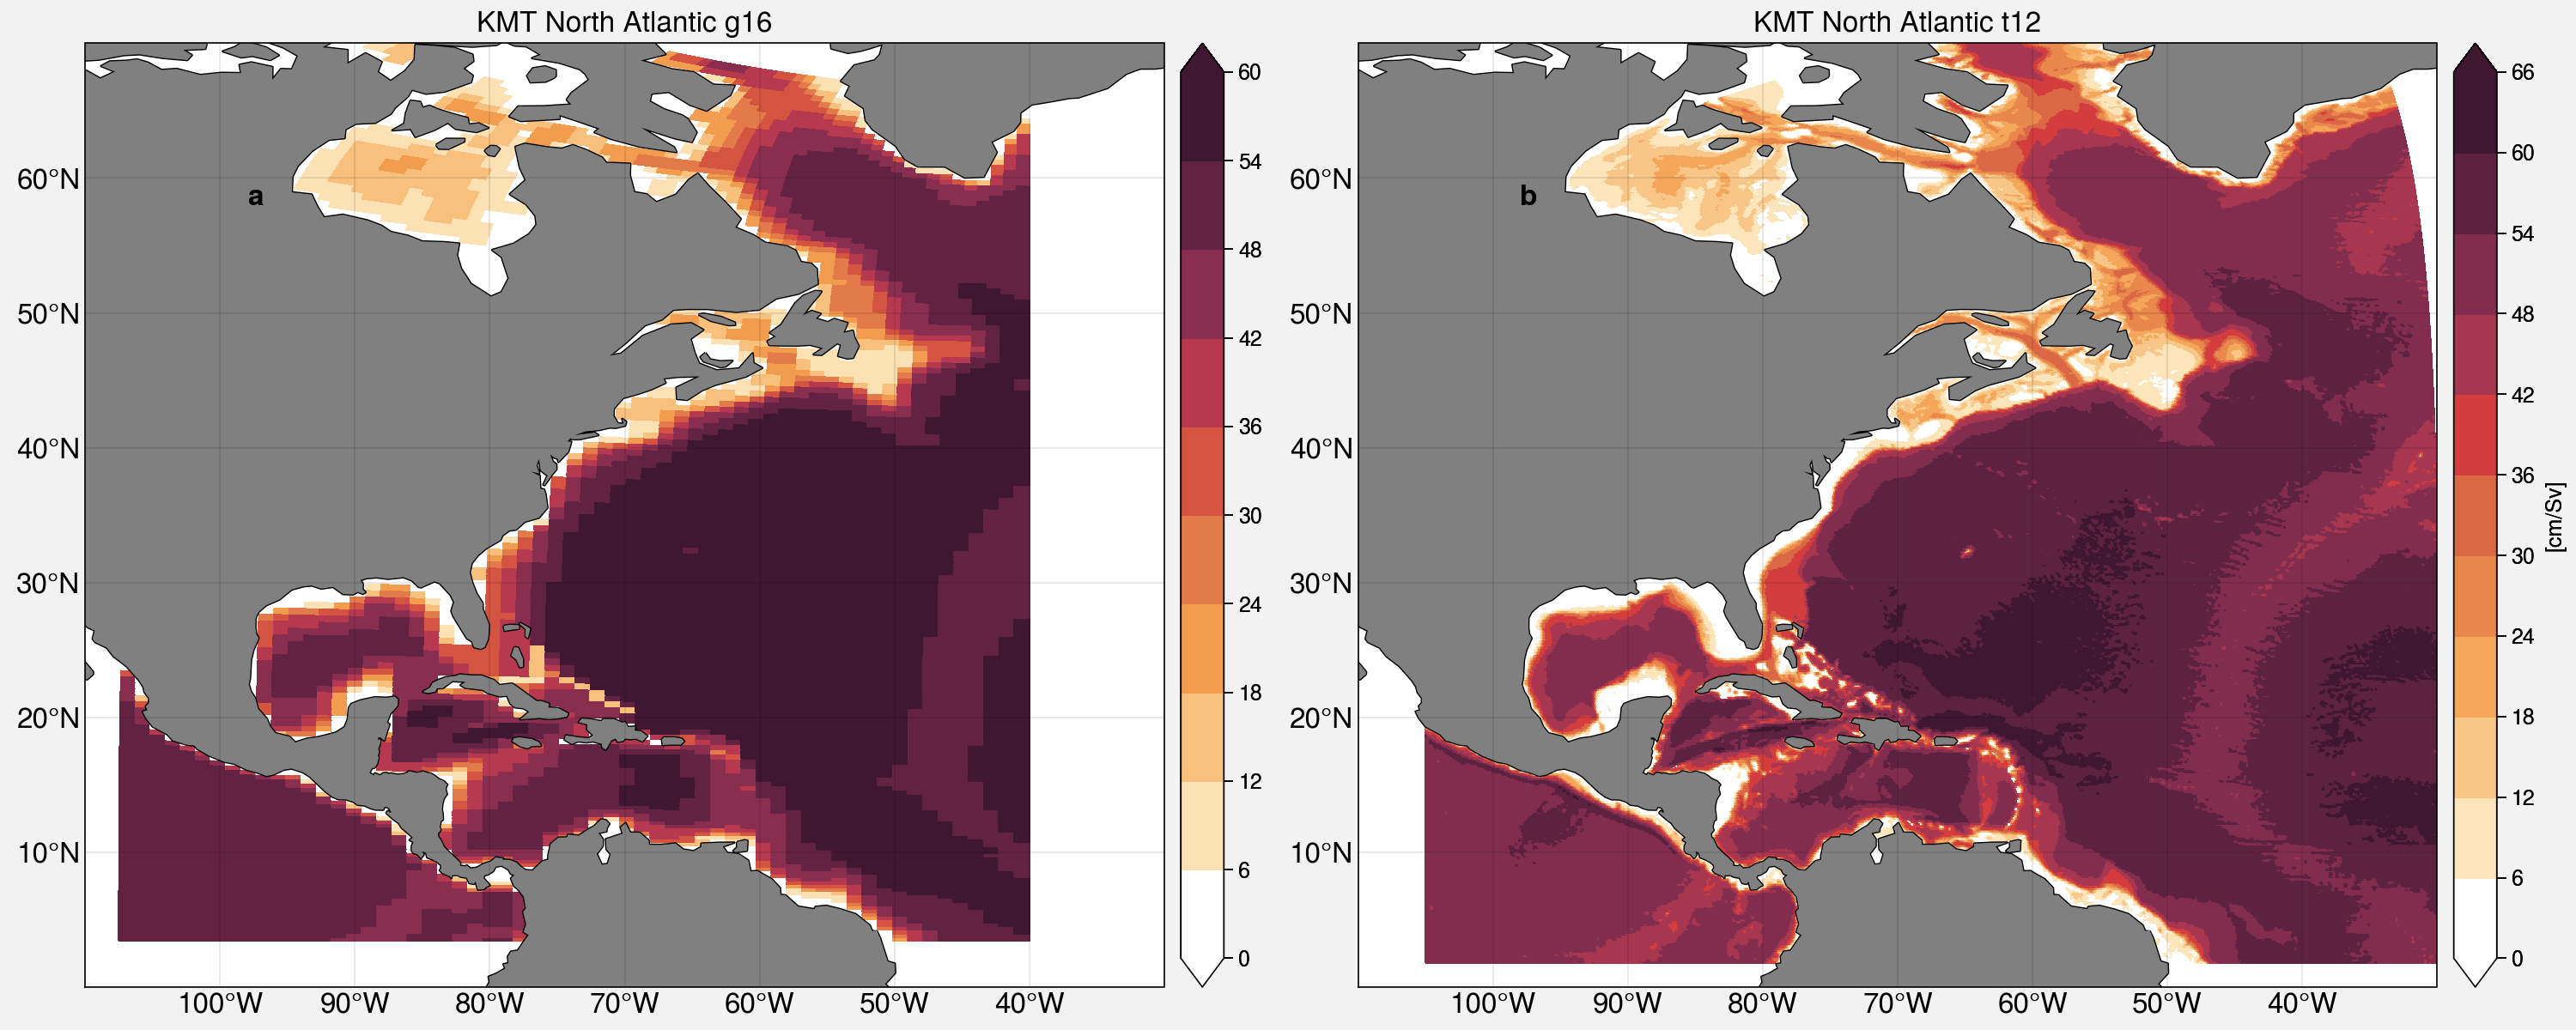

In [6]:
pc = cartopy.crs.PlateCarree()
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()

fig1, axs = plot.subplots(nrows=1,ncols=2,proj='cyl',width='15in',height='6in')

# g16
m00=axs[0,0].pcolormesh(ds_NA_g16.TLONG, ds_NA_g16.TLAT, ds_NA_g16.KMT, transform=pc)
axs[0,0].coastlines(resolution='110m', color='black', linewidth=1)
axs[0,0].format(land=True, landcolor='grey')
axs[0,0].set_extent([lon1-10, lon2+10, lat1-10, lat2+10], crs=pc)
axs[0,0].set_xticks(np.arange(lon1,lon2+1,10), crs=pc)
axs[0,0].set_xticklabels(np.arange(lon1,lon2+1,10), fontsize=12)
axs[0,0].xaxis.set_major_formatter(lon_formatter)
axs[0,0].set_yticks(np.arange(lat1, lat2+1,10), crs=pc)
axs[0,0].set_yticklabels(np.arange(lat1, lat2+1,10), fontsize=12)
axs[0,0].yaxis.set_major_formatter(lat_formatter)
axs[0,0].set_title('KMT North Atlantic g16', fontsize=12)
axs[0,0].text(-98, 58, 'a', transform=pc, fontsize=12, fontweight='bold')
cb = axs[0,0].colorbar(m00, loc='r', label='', extend='both', width='2em', shrink=1)

# t12
m01=axs[0,1].pcolormesh(ds_NA_t12.TLONG, ds_NA_t12.TLAT, ds_NA_t12.KMT, transform=pc)
axs[0,1].coastlines(resolution='110m', color='black', linewidth=1)
axs[0,1].format(land=True, landcolor='grey')
axs[0,1].set_extent([lon1-10, lon2+10, lat1-10, lat2+10], crs=pc)
axs[0,1].set_xticks(np.arange(lon1,lon2+1,10), crs=pc)
axs[0,1].set_xticklabels(np.arange(lon1,lon2+1,10), fontsize=12)
axs[0,1].xaxis.set_major_formatter(lon_formatter)
axs[0,1].set_yticks(np.arange(lat1,lat2+1,10), crs=pc)
axs[0,1].set_yticklabels(np.arange(lat1,lat2+1,10), fontsize=12)
axs[0,1].yaxis.set_major_formatter(lat_formatter)
axs[0,1].set_title('KMT North Atlantic t12', fontsize=12)
axs[0,1].text(-98, 58, 'b', transform=pc, fontsize=12, fontweight='bold')
cb = axs[0,1].colorbar(m01, loc='r', label='[cm/Sv]', extend='both', width='2em', shrink=1)

Gulf of Maine (GM)

In [7]:
ds_GM_t12.TLONG.shape, ds_GM_g16.TLONG.shape, 

((100, 150), (120, 60))

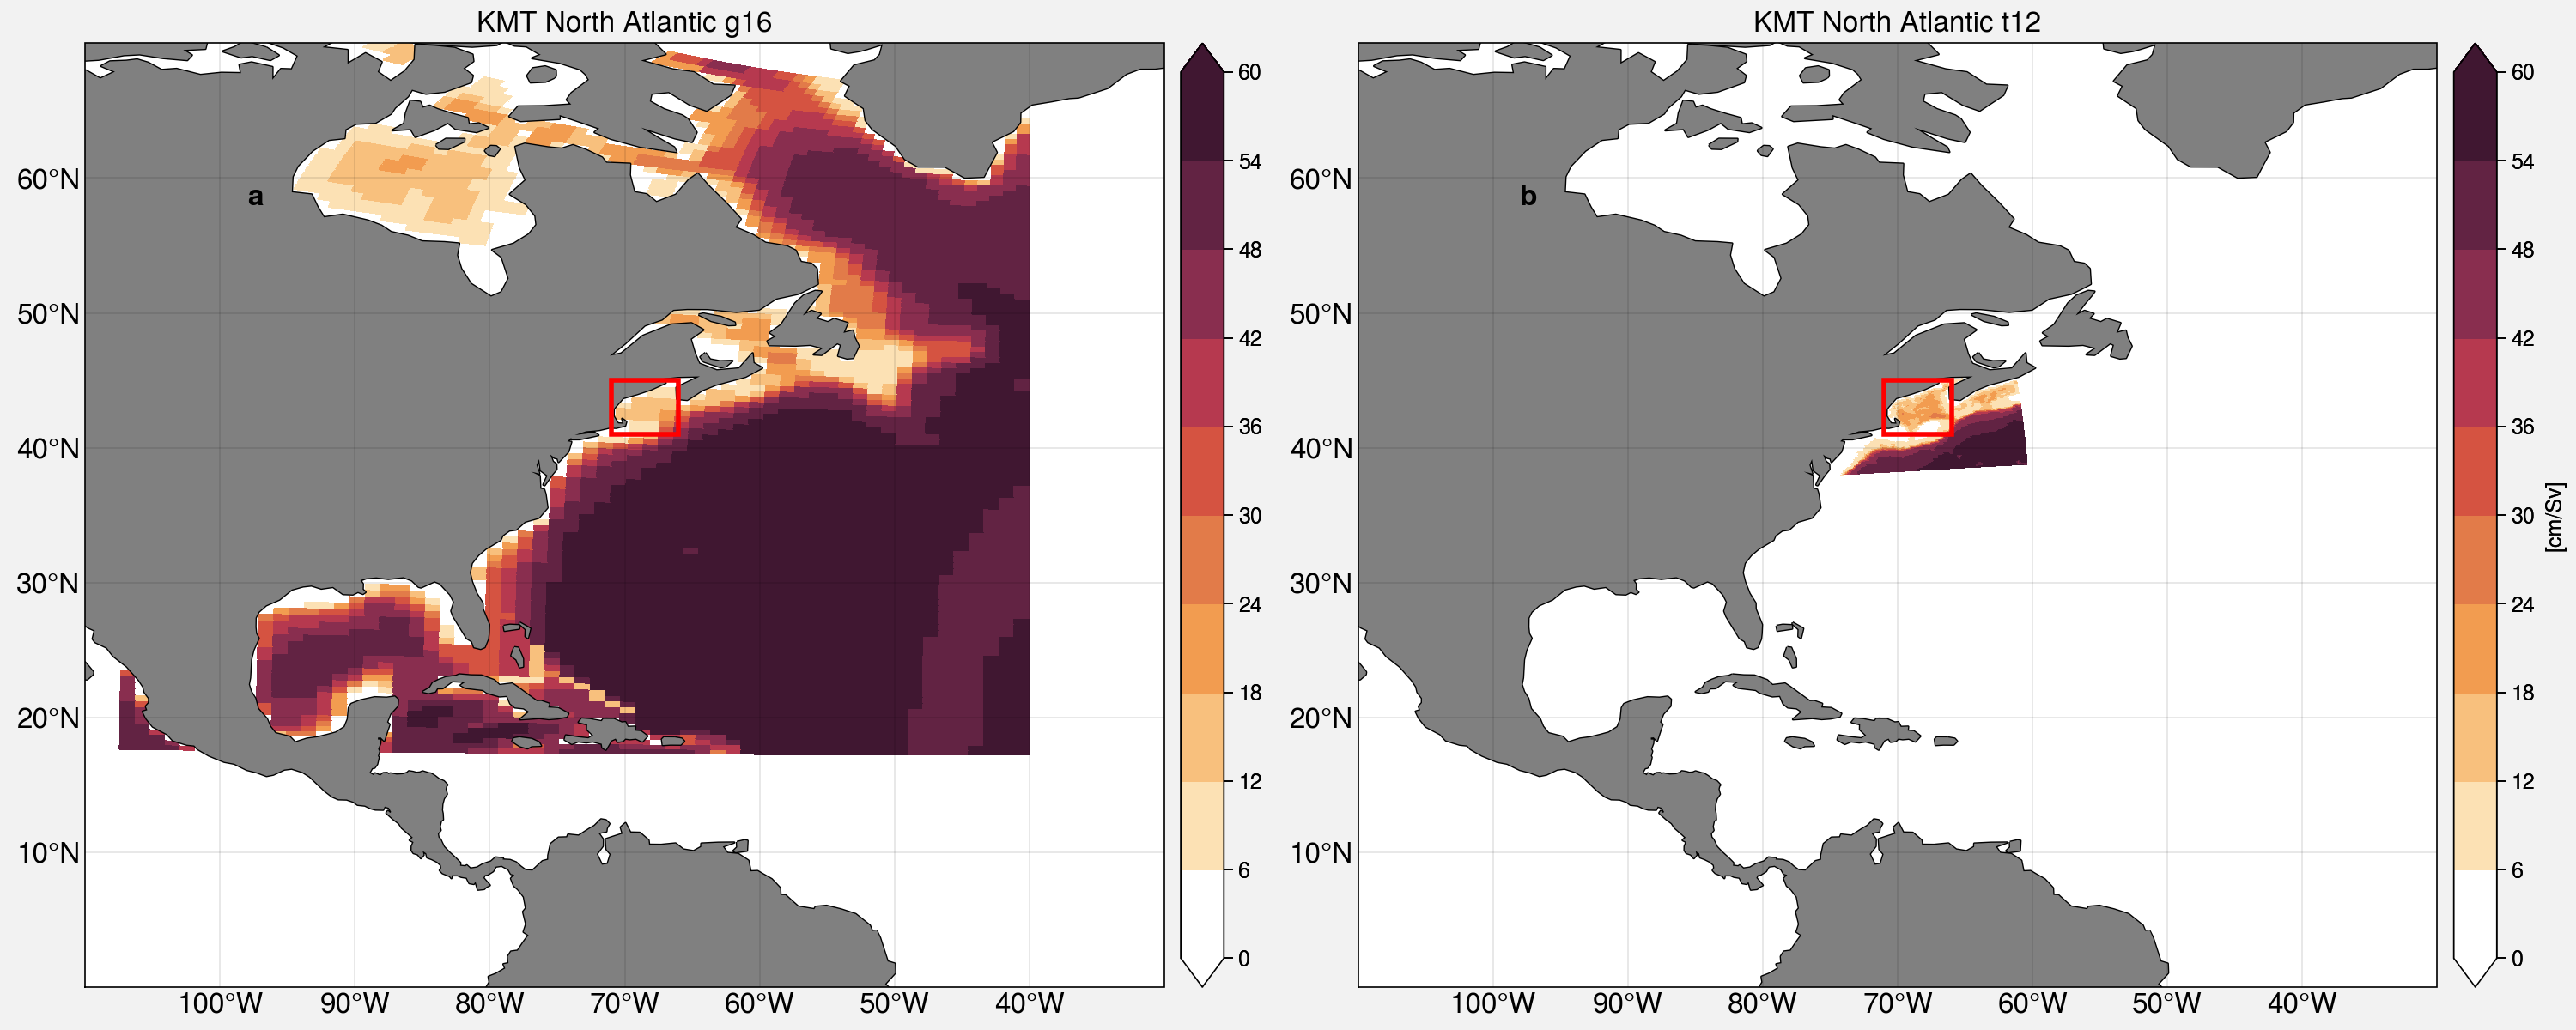

In [8]:
pc = cartopy.crs.PlateCarree()
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()

fig1, axs = plot.subplots(nrows=1,ncols=2,proj='cyl',width='15in',height='6in')

# g16
m00=axs[0,0].pcolormesh(ds_GM_g16.TLONG, ds_GM_g16.TLAT, ds_GM_g16.KMT, transform=pc)
axs[0,0].coastlines(resolution='110m', color='black', linewidth=1)
axs[0,0].format(land=True, landcolor='grey')
axs[0,0].set_extent([lon1-10, lon2+10, lat1-10, lat2+10], crs=pc)
axs[0,0].set_xticks(np.arange(lon1,lon2+1,10), crs=pc)
axs[0,0].set_xticklabels(np.arange(lon1,lon2+1,10), fontsize=12)
axs[0,0].xaxis.set_major_formatter(lon_formatter)
axs[0,0].set_yticks(np.arange(lat1, lat2+1,10), crs=pc)
axs[0,0].set_yticklabels(np.arange(lat1, lat2+1,10), fontsize=12)
axs[0,0].yaxis.set_major_formatter(lat_formatter)
axs[0,0].set_title('KMT North Atlantic g16', fontsize=12)
axs[0,0].text(-98, 58, 'a', transform=pc, fontsize=12, fontweight='bold')
cb = axs[0,0].colorbar(m00, loc='r', label='', extend='both', width='2em', shrink=1)
ap=axs[0,0].add_patch(mpatches.Rectangle(xy=[-71, 41], width=5, height=4,
                                    facecolor='none',
                                    transform=pc,
                                    linewidth=2, edgecolor='r'))
ap.set_zorder(2)

# t12
m01=axs[0,1].pcolormesh(ds_GM_t12.TLONG, ds_GM_t12.TLAT, ds_GM_t12.KMT, transform=pc)
ap=axs[0,1].add_patch(mpatches.Rectangle(xy=[-71, 41], width=5, height=4,
                                    facecolor='none',
                                    transform=pc,
                                    linewidth=2, edgecolor='r'))
ap.set_zorder(2)
axs[0,1].coastlines(resolution='110m', color='black', linewidth=1)
axs[0,1].format(land=True, landcolor='grey')
axs[0,1].set_extent([lon1-10, lon2+10, lat1-10, lat2+10], crs=pc)
axs[0,1].set_xticks(np.arange(lon1,lon2+1,10), crs=pc)
axs[0,1].set_xticklabels(np.arange(lon1,lon2+1,10), fontsize=12)
axs[0,1].xaxis.set_major_formatter(lon_formatter)
axs[0,1].set_yticks(np.arange(lat1,lat2+1,10), crs=pc)
axs[0,1].set_yticklabels(np.arange(lat1,lat2+1,10), fontsize=12)
axs[0,1].yaxis.set_major_formatter(lat_formatter)
axs[0,1].set_title('KMT North Atlantic t12', fontsize=12)
axs[0,1].text(-98, 58, 'b', transform=pc, fontsize=12, fontweight='bold')
cb = axs[0,1].colorbar(m01, loc='r', label='[cm/Sv]', extend='both', width='2em', shrink=1)

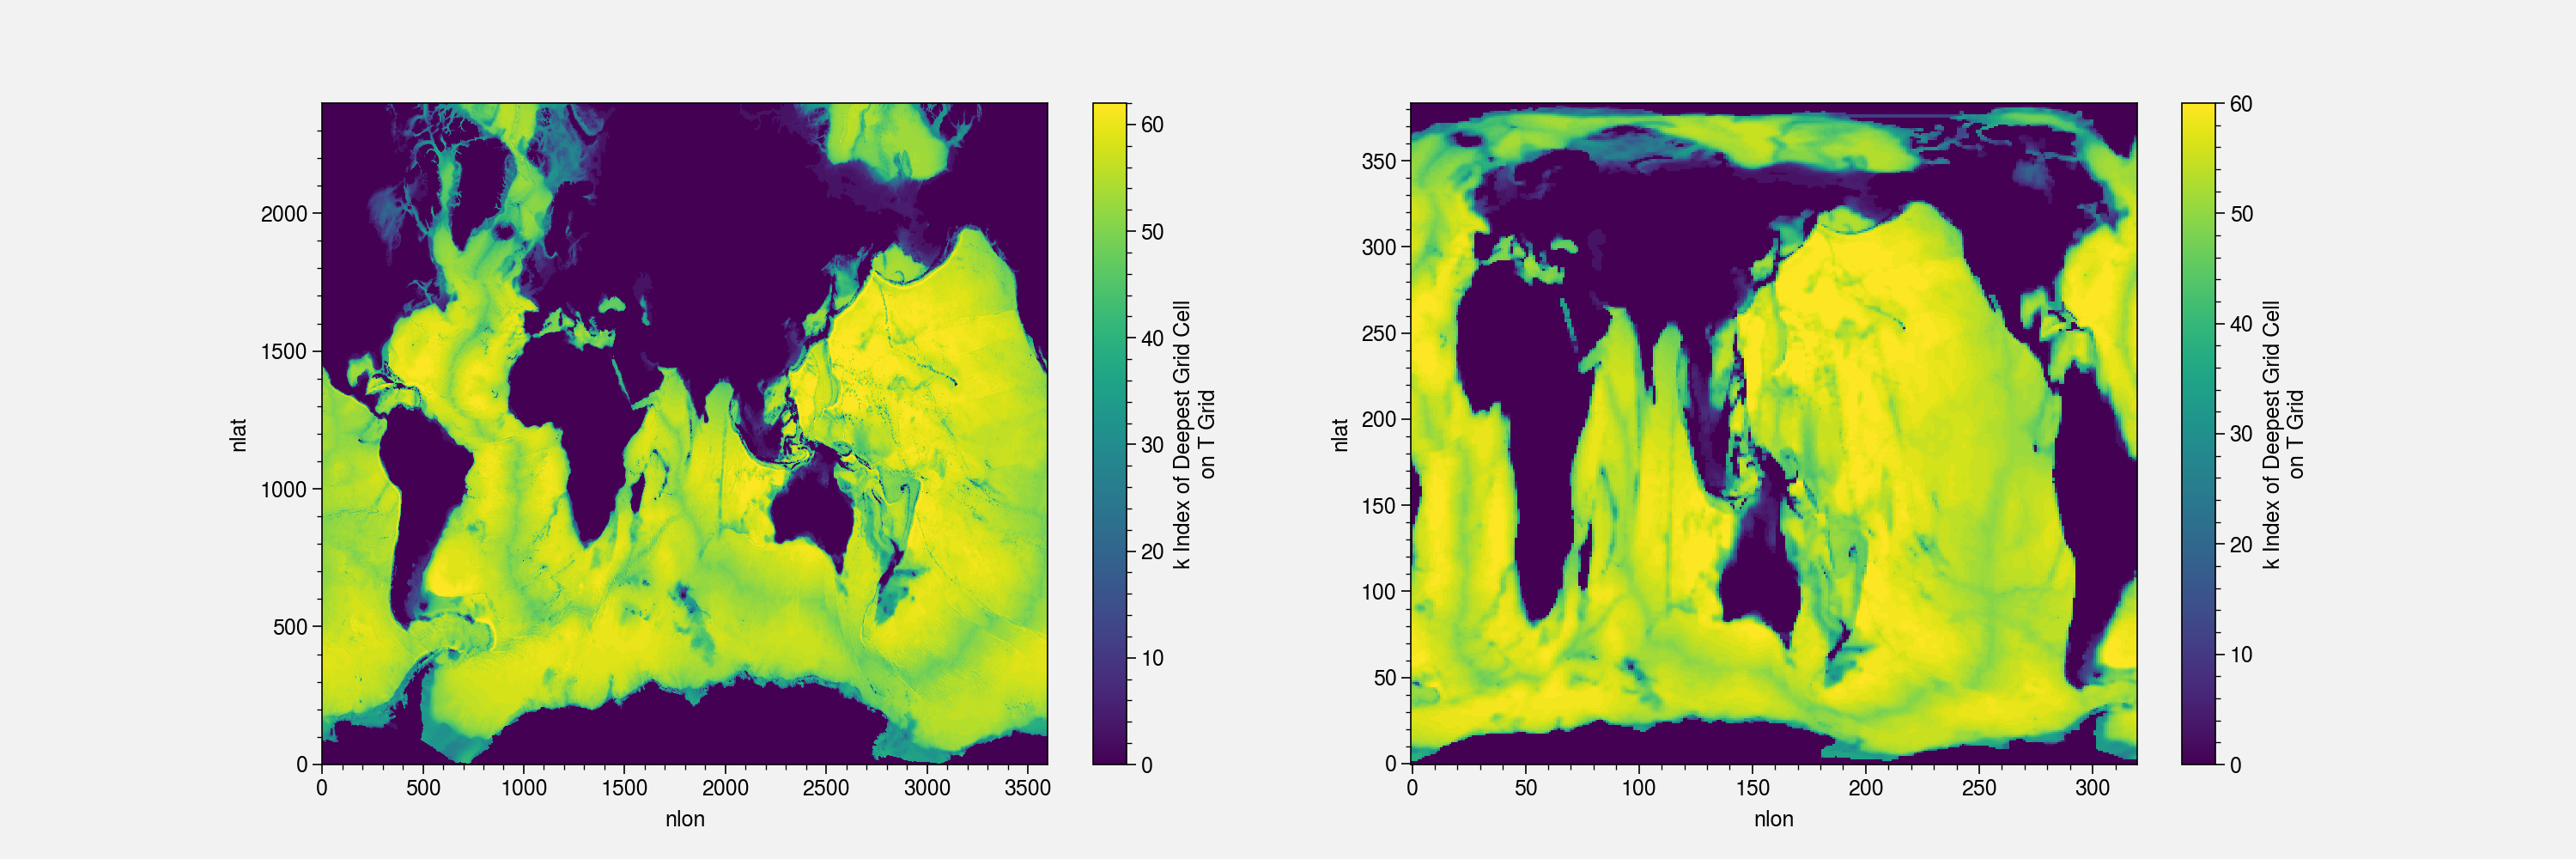

In [7]:
fig, axs = plt.subplots(1,2,figsize=(15,5))
ds_t12.KMT.plot(ax=axs[0])
ds_g16.KMT.plot(ax=axs[1])